In [1]:
import mdtraj as md
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import math
from numpy import log2, zeros, mean, var, sum, loadtxt, arange, \
                  array, cumsum, dot, transpose, diagonal, floor
from numpy.linalg import inv, lstsq

In [2]:
pdb='/Users/kaushikborthakur1211/Desktop/ABL1/ABL1.pdb'
trajectory='/Users/kaushikborthakur1211/Desktop/ABL1/ABL1.dcd'
outdir='/Users/kaushikborthakur1211/Desktop/ABL1/output/'
if not os.path.exists('outdir'):
    os.makedirs('outdir')
    
print("outdir:",outdir)
print("pdb:",pdb)
print("trjaectory:",trajectory)

outdir: /Users/kaushikborthakur1211/Desktop/ABL1/output/
pdb: /Users/kaushikborthakur1211/Desktop/ABL1/ABL1.pdb
trjaectory: /Users/kaushikborthakur1211/Desktop/ABL1/ABL1.dcd


In [3]:
trj = md.load(trajectory, top=pdb,stride=1)
trj.center_coordinates()
top = trj.topology
first_frame = 0
last_frame = trj.n_frames
n_frames=trj.n_frames

In [4]:
nres=[]
for res in trj.topology.residues: nres.append(res.resSeq)
sequence=(' %s' % [residue for residue in trj.topology.residues])
resname=(' %s' % [residue.name for residue in trj.topology.residues])
resindex=(' %s' % [residue.index for residue in trj.topology.residues])
res_num=(' %s' % [residue.resSeq  for residue in trj.topology.residues])



#log = open("/Users/paulrobustelli/Desktop/Sa_calc.log", "w")
print("** SYSTEM INFO **\n")
print("Number of atoms: %d\n" % trj.n_atoms)
print("Number of residues: %d\n" % len(set(nres)))
print("Number of frames: %d\n" % trj.n_frames)
print("Starting frame: %d\n" % first_frame)
print("Last frame: %d\n" % last_frame)
print("sequence: %s\n" % sequence)
print("residue names: %s\n" % resname)
print("residue number: %s\n" % res_num)
print("residue index: %s\n" % resindex)

** SYSTEM INFO **

Number of atoms: 4062

Number of residues: 252

Number of frames: 4000

Starting frame: 0

Last frame: 4000

sequence:  [ILE242, THR243, MET244, LYS245, HIS246, LYS247, LEU248, GLY249, GLY250, GLY251, GLN252, TYR253, GLY254, GLU255, VAL256, TYR257, GLU258, GLY259, VAL260, TRP261, LYS262, LYS263, TYR264, SER265, LEU266, THR267, VAL268, ALA269, VAL270, LYS271, THR272, LEU273, LYS274, GLU275, ASP276, THR277, MET278, GLU279, VAL280, GLU281, GLU282, PHE283, LEU284, LYS285, GLU286, ALA287, ALA288, VAL289, MET290, LYS291, GLU292, ILE293, LYS294, HIS295, PRO296, ASN297, LEU298, VAL299, GLN300, LEU301, LEU302, GLY303, VAL304, CYS305, THR306, ARG307, GLU308, PRO309, PRO310, PHE311, TYR312, ILE313, ILE314, THR315, GLU316, PHE317, MET318, THR319, TYR320, GLY321, ASN322, LEU323, LEU324, ASP325, TYR326, LEU327, ARG328, GLU329, CYS330, ASN331, ARG332, GLN333, GLU334, VAL335, ASN336, ALA337, VAL338, VAL339, LEU340, LEU341, TYR342, MET343, ALA344, THR345, GLN346, ILE347, SER348, SER3

In [5]:
residue_num=[]
for res in top.residues: 
    residue_num.append(res.resSeq)
residue_id=np.asarray(residue_num)
residue_id

array([242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254,
       255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267,
       268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280,
       281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293,
       294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306,
       307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319,
       320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332,
       333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345,
       346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358,
       359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371,
       372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384,
       385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397,
       398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410,
       411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 42

In [6]:
#Use DSSP to calculate the secondary structure definition
#https://mdtraj.org/1.9.4/api/generated/mdtraj.compute_dssp.html
dssp=md.compute_dssp(trj,simplified=True)
dssp

array([['C', 'E', 'E', ..., 'C', 'C', 'C'],
       ['C', 'E', 'E', ..., 'H', 'C', 'C'],
       ['C', 'E', 'E', ..., 'C', 'C', 'C'],
       ...,
       ['C', 'E', 'E', ..., 'C', 'C', 'C'],
       ['C', 'E', 'E', ..., 'C', 'C', 'C'],
       ['C', 'E', 'E', ..., 'C', 'C', 'C']], dtype='<U2')

HOMEWORK PROBLEM 1:

In [7]:
print(dssp.shape)
print("Rows:",len(dssp))
print("Columns:",len(dssp[0]))

#Print out helix and beta residues for a given frame
frame=0
dssp_frame=np.column_stack((residue_id,dssp[frame]))
helix_res=np.where(dssp_frame[:,1]=='H')
beta_res=np.where(dssp_frame[:,1]=='E')
#print('helical residues:',dssp_frame[helix_res])
#print('beta residues:',dssp_frame[beta_res])

(4000, 252)
Rows: 4000
Columns: 252


In [8]:
dssp=md.compute_dssp(trj,simplified=False)
dssp

array([[' ', 'E', 'E', ..., 'T', 'T', ' '],
       [' ', 'E', 'E', ..., 'H', 'T', ' '],
       [' ', 'E', 'E', ..., 'T', 'T', ' '],
       ...,
       [' ', 'E', 'E', ..., 'T', ' ', ' '],
       [' ', 'E', 'E', ..., 'T', ' ', ' '],
       [' ', 'E', 'E', ..., 'T', ' ', ' ']], dtype='<U2')

(350.0, 400.0)

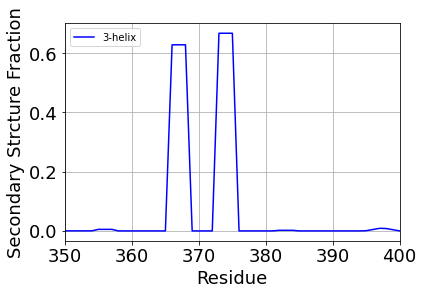

In [9]:
def dssp_convert(dssp):
    dsspG = np.copy(dssp)
    dsspG[dsspG!='G']=0
    dsspG[dsspG=='G']=1 
    dsspG=dsspG.astype(int)
    TotalG=np.sum(dsspG,axis=1) 
    Gprop=np.sum(dsspG,axis=0).astype(float)/len(dsspG)
    return Gprop, TotalG
Gprop, TotalG = dssp_convert(dssp)
plt.plot(residue_num,Gprop,c='b',label='3-helix')
plt.legend(loc="upper left")
plt.xlabel('Residue', size=18)
plt.ylabel('Secondary Strcture Fraction', size=18)
plt.tick_params(labelsize=18)
plt.grid()
plt.xlim(350,400)

In [11]:
from IPython.display import Image
Image(filename='img/q1.png')

HOMEWORK PROBLEM 2

Ipython.display not working properly so couldnt embed images in the notebook. The snapshots are outside in the main repository

In [12]:
dssp=md.compute_dssp(trj,simplified=True)

def dssp_convert(dssp):
 dsspH=np.copy(dssp)
 dsspE=np.copy(dssp)
 dsspH[dsspH=='H']=1                                                                                      
 dsspH[dsspH=='E']=0                                                                                      
 dsspH[dsspH=='C']=0                                                                                      
 dsspH[dsspH=='NA']=0 
 dsspH=dsspH.astype(int)
 TotalH=np.sum(dsspH,axis=1) 
 Hprop=np.sum(dsspH,axis=0).astype(float)/len(dsspE) 

 dsspC[dsspC=='H']=0
 dsspC[dsspC=='E']=0
 dsspC[dsspC=='C']=1
 dsspC[dsspC=='NA']=0
 dsspC=dsspC.astype(int)
 TotalC=np.sum(dsspC,axis=1) 
 Cprop=np.sum(dsspC,axis=0).astype(float)/len(dsspC) 
 return Hprop, Cprop

In [13]:
residue_number=340
array_index=residue_number-242
print(np.asarray(residue_num)[array_index])
helix_frames=np.where(dssp[:,array_index]=='H')
coil_frames=np.where(dssp[:,array_index]=='C')


340


In [14]:
dssp.shape

(4000, 252)

In [15]:
def sec_frac(dssp, ele):
    bi = np.where(dssp==ele,1,0)
    frac = np.sum(bi,axis=0)/dssp.shape[0]
    return frac

In [16]:
H_propen=sec_frac(dssp, 'H')

In [17]:
C_propen= sec_frac(dssp, 'C')

In [18]:
for i in range(252):
    if ((H_propen[i]>0.3 and C_propen[i]>0.3)):
        print(i, H_propen[i], C_propen[i], i+242)

49 0.35425 0.64575 291
124 0.628 0.372 366
125 0.628 0.372 367
126 0.628 0.372 368
131 0.667 0.333 373
132 0.667 0.333 374
133 0.667 0.333 375
161 0.37825 0.62175 403
162 0.37825 0.62175 404
163 0.37825 0.62175 405
171 0.3075 0.6925 413
178 0.38225 0.61775 420
203 0.47175 0.52825 445
204 0.4795 0.5205 446
205 0.4825 0.5175 447
206 0.5755 0.4245 448
238 0.334 0.666 480
239 0.334 0.666 481
240 0.334 0.666 482
248 0.60625 0.39375 490
249 0.37675 0.62325 491


In [21]:
np.where(dssp[:,49]=="C")

(array([   0,    1,    2, ..., 3997, 3998, 3999]),)

In [22]:
np.where(dssp[:,49]=="H")

(array([   3,    4,    5, ..., 3887, 3972, 3993]),)

In [23]:
indices_phi, phis = md.compute_phi(trj)
indices_psi, psis = md.compute_psi(trj)
indices_chi1, chi1s = md.compute_chi1(trj)
indices_chi2, chi2s = md.compute_chi2(trj)

/Users/kaushikborthakur1211/opt/anaconda3/envs/New_env/lib/python3.7/site-packages/mdtraj/geometry/dihedral.py:374: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  indices = np.vstack(x for x in indices if x.size)[id_sort]


In [24]:
np.shape(phis[:,0])

(4000,)

In [25]:
phi_dict={}
dihedral_dict = { 'phi': { },
          'psi': { },
          'chi1': { },
          'chi2': { }}

for i in range(0,len(indices_phi)):
  indices=indices_phi[i]
  atom=top.atom(indices[1])
  resnum=top.atom(indices[1]).residue.resSeq
  dihedral_dict['phi'][resnum]=phis[:,i]

for i in range(0,len(indices_psi)):
  indices=indices_psi[i]
  atom=top.atom(indices[1])
  resnum=top.atom(indices[1]).residue.resSeq
  dihedral_dict['psi'][resnum]=psis[:,i]

for i in range(0,len(indices_chi1)):
  indices=indices_chi1[i]
  atom=top.atom(indices[1])
  resnum=top.atom(indices[1]).residue.resSeq
  dihedral_dict['chi1'][resnum]=chi1s[:,i]

for i in range(0,len(indices_chi2)):
  indices=indices_chi2[i]
  atom=top.atom(indices[1])
  resnum=top.atom(indices[1]).residue.resSeq
  dihedral_dict['chi2'][resnum]=chi2s[:,i]

In [26]:
def plot_phipsi(res):
 plt.hist2d(dihedral_dict['phi'][res],dihedral_dict['psi'][res],bins=36,range=[[-3.14,3.14],[-3.14,3.14]], norm=colors.LogNorm(),cmap='jet')
 plt.xlabel('$\phi$', size=18)
 plt.ylabel('$\psi$', size=18)
 plt.xticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
 plt.yticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
 plt.tick_params(labelsize=18)
 plt.show()
 return

def plot_chi(res):
    if res in dihedral_dict['chi1']:
     plt.hist(dihedral_dict['chi1'][res],bins=36,range=[-3.14,3.14])        
     plt.xticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
     plt.xlabel('$\chi_1$', size=18)
     plt.ylabel('counts', size=18)
     plt.tick_params(labelsize=18)
     plt.show()
     plt.clf()   
    if res in dihedral_dict['chi2']:
     plt.hist2d(dihedral_dict['chi1'][res],dihedral_dict['chi2'][res],bins=36,range=[[-3.14,3.14],[-3.14,3.14]], norm=colors.LogNorm(),cmap='jet')
     plt.xlabel('$\chi_1$', size=18)
     plt.ylabel('$\chi_2$', size=18)
     plt.xticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
     plt.yticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
     plt.tick_params(labelsize=18)
     plt.show()
    return

HOMEWORK PROBLEM 3:

In [32]:
for i in range(300,340):
    #print(i)
    #plot_chi(i)  

SyntaxError: unexpected EOF while parsing (1312354767.py, line 3)

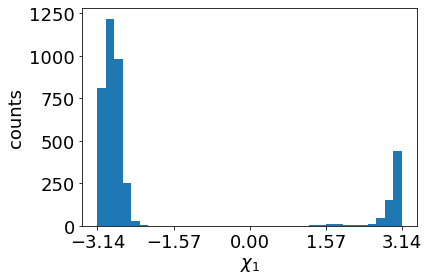

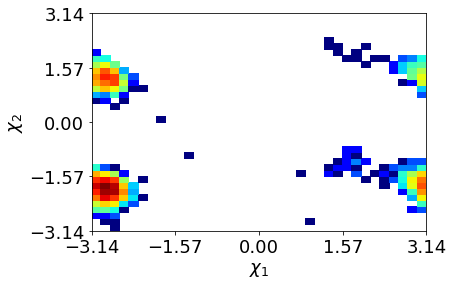

In [31]:
plot_chi(317)

In [33]:
#I picked residue 317 from the above plots (COMMENTED THEM OUT BECAUSE THEY WERE TOO MANY IN NUMBER)
x1 = dihedral_dict["chi1"][317]
x2 = dihedral_dict["chi2"][317]

In [35]:
x1x2_frames_state_1= []
for i in range(4000):
    if ((-3.14<x1[i]<3.0) & (-2.5<x2[i]<-1.5)):
           x1x2_frames_state_1.append(i)
    #print(i, x1[i], x2[i])

In [36]:
x1x2_frames_state_2= []
for i in range(4000):
    if ((2.95<x1[i]<3.14) & (-2.5<x2[i]<-1.5)):
           x1x2_frames_state_2.append(i)
    #print(i, x1[i], x2[i])

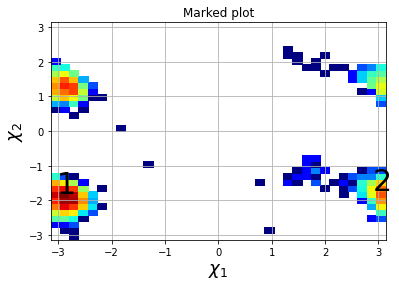

In [37]:
plt.hist2d(dihedral_dict["chi1"][317],dihedral_dict["chi2"][317],bins=36,range=[[-3.14,3.14],[-3.14,3.14]], norm=colors.LogNorm(),cmap='jet')
plt.annotate("1",(dihedral_dict["chi1"][317][578],dihedral_dict["chi2"][317][578]),color="Black",size="30")
plt.annotate("2",(dihedral_dict["chi1"][317][3260],dihedral_dict["chi2"][317][3260]),color="black",size="30")
plt.title("Marked plot")
plt.xlabel('$\chi_1$', size=18)
plt.ylabel('$\chi_2$', size=18)
plt.grid()

HOMEWORK PROBLEM 4:

In [38]:
# for i in range(380,420):
#     print(i)
#     plot_phipsi(i)
# #398

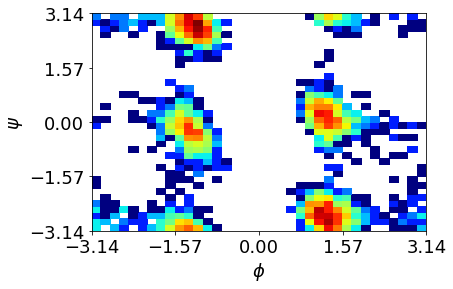

In [39]:
plot_phipsi(398)

In [40]:
psi398 = dihedral_dict["psi"][398]
phi398 = dihedral_dict["phi"][398]

In [41]:
phipsi_frames_1 = []
for i in range(4000):
    if ((-1.60<phi398[i]<-1.50)&(-0.67<psi398[i]<0.5)):
        phipsi_frames_1.append(i)
    #print(i, phi398[i], psi398[i])

In [42]:
phipsi_frames_2 = []
for i in range(4000):
    if ((-1.60<phi398[i]<-0.80)&(1.70<psi398[i]<3.14)):
        phipsi_frames_2.append(i)
    #print(i, phi398[i], psi398[i])

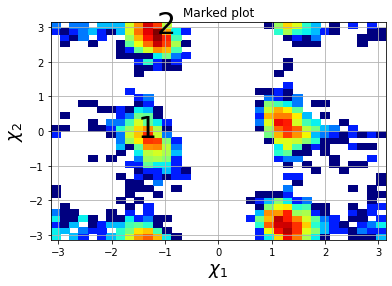

In [43]:
plt.hist2d(dihedral_dict["phi"][398],dihedral_dict["psi"][398],bins=36,range=[[-3.14,3.14],[-3.14,3.14]], norm=colors.LogNorm(),cmap='jet')
plt.annotate("1",(dihedral_dict["phi"][398][63],dihedral_dict["psi"][398][63]),color="Black",size="30")
plt.annotate("2",(dihedral_dict["phi"][398][769],dihedral_dict["psi"][398][769]),color="black",size="30")
plt.title("Marked plot")
plt.xlabel('$\chi_1$', size=18)
plt.ylabel('$\chi_2$', size=18)
plt.grid()